In [ ]:
import pandas as pd
import numpy as np
!pip install tensorflow
!pip intall keras
import keras
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor
from keras.models import Sequential
from keras.layers import InputLayer,Dense

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "intall" - maybe you meant "install"


In [ ]:
data=pd.read_csv("/content/gas_turbines.csv")

In [ ]:
data.head()

,AT,AP,AH,AFDP,GTEP,TIT,TAT,TEY,CDP,CO,NOX
0,6.8594,1007.9,96.799,3.5000,19.663,1059.2,550.00,114.70,10.605,3.1547,82.722
1,6.7850,1008.4,97.118,3.4998,19.728,1059.3,550.00,114.72,10.598,3.2363,82.776
2,6.8977,1008.8,95.939,3.4824,19.779,1059.4,549.87,114.71,10.601,3.2012,82.468
3,7.0569,1009.2,95.249,3.4805,19.792,1059.6,549.99,114.72,10.606,3.1923,82.670
4,7.3978,1009.7,95.150,3.4976,19.765,1059.7,549.98,114.72,10.612,3.2484,82.311


In [ ]:
data.shape

(15039, 11)

In [ ]:
data.dtypes

AT      float64
AP      float64
AH      float64
AFDP    float64
GTEP    float64
TIT     float64
TAT     float64
TEY     float64
CDP     float64
CO      float64
NOX     float64
dtype: object

In [ ]:
data.isnull().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [ ]:
X=data.loc[:,['AT','AP','AH','AFDP','GTEP','TIT','TAT','CDP','CO','NOX']]
y=data.loc[:,['TEY']]

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
scaler=StandardScaler()
X=scaler.fit_transform(X)
y=scaler.fit_transform(y)

In [ ]:
def baseline_model():
  model=Sequential()
  model.add(Dense(10,input_dim=10,activation='tanh'))
  model.add(Dense(1))
  model.compile(loss='mean_squared_error',optimizer='adam')
  return model

In [ ]:
estimator=KerasRegressor(build_fn=baseline_model,nb_epoch=50,batch_size=100,verbose=False)
kfold=KFold(n_splits=10)
results=cross_val_score(estimator,X,y,cv=kfold)
print("Results:%.2f(%.2f)MSE"%(results.mean(),results.std()))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  """Entry point for launching an IPython kernel.


Results:-0.20(0.18)MSE


In [ ]:
estimator.fit(X,y)
prediction=estimator.predict(X)
prediction

array([-0.6408247 , -0.64655733, -0.6612324 , ..., -1.1611727 ,
       -0.9921964 , -0.7771598 ], dtype=float32)

# Train-Test split model validation technique

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3)

In [ ]:
estimator.fit(X_train,y_train)
prediction=estimator.predict(X_test)

In [ ]:
prediction

array([ 0.22232132,  0.41386062,  0.7546045 , ..., -0.94570833,
       -0.16630203, -0.13452706], dtype=float32)

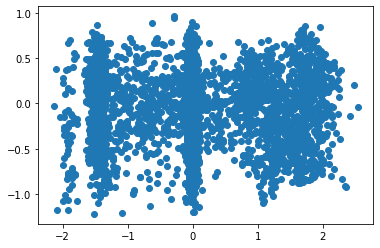

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,prediction)

# Using Tensorflow

In [ ]:
X=data.drop(columns=['TEY'],axis=1)
y=data.iloc[:,-1]

In [ ]:
from sklearn.preprocessing import scale
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)
X_train_scaled=scale(X_train)
X_test_scaled=scale(X_test)
X_test_scaled

array([[ 0.82623246, -0.43954308, -0.25924569, ...,  0.10039242,
        -0.3796304 , -0.69217007],
       [ 0.35282087,  0.23279782,  0.80230139, ..., -1.18541222,
         0.39149515, -1.09475442],
       [ 0.32839008, -0.07135639,  0.25312287, ...,  0.01665304,
        -0.00296896, -0.31891741],
       ...,
       [-0.74071701,  0.37687087,  0.43427425, ...,  1.77157829,
        -1.00127821, -0.4818816 ],
       [-0.49965786, -0.39151873,  0.64680105, ..., -0.26517949,
        -0.48137538,  0.12808615],
       [ 0.13151427,  0.32884652,  0.98830762, ..., -1.40331469,
         0.13152215, -0.64456466]])

In [ ]:
import tensorflow as tf
input_size=len(X.columns)
output_size=1
hidden_layer_size=50
model = tf.keras.Sequential([
                                
                               tf.keras.layers.Dense(hidden_layer_size, input_dim = input_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),
                               tf.keras.layers.Dense(hidden_layer_size, activation = 'relu'),     
                               tf.keras.layers.Dense(output_size)
                             ])

In [ ]:
optimizer = tf.keras.optimizers.SGD(learning_rate = 0.03)
model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['MeanSquaredError'])

In [ ]:
num_epochs = 100
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 2)
model.fit(X_train_scaled, y_train, callbacks = early_stopping, validation_split = 0.1, epochs = num_epochs, verbose = 2)

Epoch 1/100
381/381 - 1s - loss: 580.1012 - mean_squared_error: 580.1012 - val_loss: 48.6905 - val_mean_squared_error: 48.6905 - 1s/epoch - 3ms/step
Epoch 2/100
381/381 - 1s - loss: 22.4684 - mean_squared_error: 22.4684 - val_loss: 15.1510 - val_mean_squared_error: 15.1510 - 659ms/epoch - 2ms/step
Epoch 3/100
381/381 - 1s - loss: 8.5331 - mean_squared_error: 8.5331 - val_loss: 5.8902 - val_mean_squared_error: 5.8902 - 630ms/epoch - 2ms/step
Epoch 4/100
381/381 - 1s - loss: 3.5600 - mean_squared_error: 3.5600 - val_loss: 2.4729 - val_mean_squared_error: 2.4729 - 647ms/epoch - 2ms/step
Epoch 5/100
381/381 - 1s - loss: 1.5283 - mean_squared_error: 1.5283 - val_loss: 1.8278 - val_mean_squared_error: 1.8278 - 1s/epoch - 3ms/step
Epoch 6/100
381/381 - 1s - loss: 0.9013 - mean_squared_error: 0.9013 - val_loss: 1.0131 - val_mean_squared_error: 1.0131 - 1s/epoch - 3ms/step
Epoch 7/100
381/381 - 1s - loss: 0.6234 - mean_squared_error: 0.6234 - val_loss: 0.6876 - val_mean_squared_error: 0.6876 - 

In [ ]:
test_loss, mean_squared_error = model.evaluate(X_test_scaled, y_test)

47/47 [==============================] - 0s 4ms/step - loss: 0.1357 - mean_squared_error: 0.1357


In [ ]:
predictions = model.predict_on_batch(X_test_scaled)

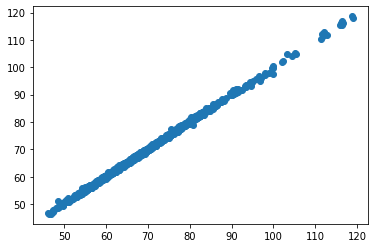

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test,predictions)

In [ ]:
predictions_df=pd.DataFrame()
predictions_df['Actual']=y_test
predictions_df['Predicted']=predictions
predictions_df["%error"]=abs(predictions_df['Actual']-predictions_df['Predicted'])/predictions_df['Actual']*100
predictions_df.reset_index(drop=True)


,Actual,Predicted,%error
0,60.954,60.973026,0.031214
1,56.658,57.011795,0.624440
2,64.937,64.809235,0.196753
3,64.836,64.842186,0.009541
4,58.706,58.949207,0.414280
...,...,...,...
1499,74.588,74.741997,0.206463
1500,103.290,104.757828,1.421074
1501,63.198,63.250465,0.083017
1502,69.707,69.464157,0.348377
